In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

import time

In [2]:
!pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user
!jupyter nbextension enable execute_time/ExecuteTime

[I 16:16:59 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 16:16:59 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 16:16:59 InstallContribNbextensionsApp] Installing /home/ubuntu/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/spellchecker -> spellchecker
[I 16:16:59 InstallContribNbextensionsApp] Up to date: /home/ubuntu/.local/share/jupyter/nbextensions/spellchecker/main.css
[I 16:16:59 InstallContribNbextensionsApp] Up to date: /home/ubuntu/.local/share/jupyter/nbextensions/spellchecker/config.yaml
[I 16:16:59 InstallContribNbextensionsApp] Up to date: /home/ubuntu/.local/share/jupyter/nbextensions/spellchecker/README.md
[I 16:16:59 InstallContribNbextensionsApp] Up to date: /home/ubuntu/.local/share/jupyter/nbextensions/spellchecker/main.js
[I 16:16:59 InstallContribNbextensionsApp] Up to date: /home/ubuntu/.local/share/jupyter/nbextensions/spellcheck

In [2]:
from src.model import *

In [3]:
SPECTRA_DIR = 'Bruker_MPA/*'

AFSIS_PATH = Path('afsis/2009-2013/Dry_Chemistry/ICRAF/')

spectra_df = load_spectra_df(SPECTRA_DIR, AFSIS_PATH)


In [4]:
wet_chem_df = pd.read_csv('afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv')
wet_chem_df.head()

,SSN,Public,EC,ExAc,ExBas,M3 Al,M3 B,M3 Ca,M3 Cu,M3 Fe,M3 K,M3 Mg,M3 Mn,M3 Na,M3 P,M3 S,M3 Zn,PH,PSI
0,icr006475,True,0.053,2.56,2.744241,1095.0,0.3337,207.1,1.3150,153.70,306.30,89.5,9.266,42.71,4.495,18.960,2.825,4.682,67.052495
1,icr006586,True,0.193,0.59,16.797753,1165.0,0.7899,1665.0,2.8140,126.80,1186.00,636.7,254.700,40.83,12.510,13.600,1.952,7.062,30.420552
2,icr007929,True,0.305,0.19,16.503619,727.6,0.6142,2518.0,0.2496,260.40,72.57,428.5,35.820,42.94,21.090,14.810,2.742,7.114,60.506163
3,icr008008,True,0.053,0.48,6.302775,1458.0,0.3603,734.3,1.3690,134.10,274.60,222.5,29.110,20.73,109.200,11.400,0.980,5.650,51.470143
4,icr010198,True,0.032,1.05,2.390303,2166.0,0.0100,261.8,1.6860,97.49,91.76,76.5,375.200,49.31,3.958,5.281,1.258,5.501,247.626533


focus on elements with known relations

In [5]:
WET_CHEM_PATH = 'afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv'
elements = ['EC', 'M3 Ca', 'M3 K', 'M3 Mg', 'M3 P', 'PH' ]
columns_to_load = elements + ['SSN']


wet_chem_df = pd.read_csv(WET_CHEM_PATH, index_col='SSN', usecols=columns_to_load)

In [6]:
%%time
data_df = spectra_df.merge(wet_chem_df, left_index=True, right_index=True)


CPU times: user 11 ms, sys: 0 ns, total: 11 ms
Wall time: 14.7 ms


In [7]:
%%time
contains_nan = data_df.isnull().values.any()
contains_nan

CPU times: user 54.9 ms, sys: 23.6 ms, total: 78.6 ms
Wall time: 77.6 ms


False

In [8]:
data_df

,12493.177,12489.320,12485.463,12481.606,12477.749,12473.892,12470.034,12466.177,12462.320,12458.463,...,3617.969,3614.111,3610.254,3606.397,3602.540,3598.683,M3 Ca,M3 K,M3 Mg,M3 P
icr049735,0.765804,0.765579,0.776812,0.795354,0.815153,0.827822,0.823997,0.810204,0.802608,0.806628,...,2.836452,2.845037,2.801358,2.664036,2.955150,2.821408,1100.00,1440.000,2250.000,20.100
icr033851,0.781866,0.782740,0.778067,0.776011,0.785837,0.794327,0.795452,0.796135,0.795599,0.795504,...,2.128170,2.226499,2.363049,2.424301,2.460464,2.437714,4898.32,1311.000,1068.000,3.200
icr068419,0.462182,0.459072,0.460319,0.461889,0.461745,0.461250,0.464106,0.470280,0.473516,0.472700,...,2.269487,2.307636,2.471763,2.745914,2.518233,2.416593,589.00,54.500,60.200,7.590
icr010078,0.900252,0.889631,0.893853,0.907193,0.921731,0.927977,0.921417,0.911963,0.908837,0.901939,...,2.596959,2.621600,2.642620,2.516314,2.375122,2.418391,466.20,71.800,106.500,11.180
icr075696,0.658960,0.654330,0.662424,0.672969,0.670191,0.663969,0.674582,0.691545,0.692512,0.682609,...,2.365294,2.268732,2.149735,2.193754,2.258132,2.280757,389.00,60.800,46.300,5.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
icr049317,0.577725,0.585054,0.594410,0.599507,0.596028,0.589259,0.583887,0.578564,0.574233,0.576303,...,2.266359,2.198900,2.379056,3.142864,3.147451,3.099391,392.00,49.000,73.700,7.710
icr030368,0.301494,0.300201,0.299240,0.299279,0.302239,0.304967,0.305884,0.306842,0.306473,0.304401,...,2.108062,2.165118,2.147911,2.130198,2.207439,2.265409,33130.00,55.360,558.000,0.554
icr033545,0.417591,0.419255,0.421359,0.418838,0.412399,0.409302,0.412396,0.418643,0.422270,0.421899,...,2.528144,2.706835,2.640629,2.687847,2.946014,2.619882,10888.30,1239.000,607.000,11.523
icr075607,0.339942,0.339147,0.341375,0.342699,0.343420,0.345608,0.346978,0.346391,0.346559,0.345918,...,2.208282,2.124147,2.161024,2.271009,2.336334,2.271137,324.00,78.400,60.800,55.000


In [11]:
%%time
y = data_df[['M3 Ca', 'M3 K', 'M3 Mg', 'M3 P']]

CPU times: user 1.15 ms, sys: 0 ns, total: 1.15 ms
Wall time: 1.12 ms


In [15]:
%%time
if contains_nan:
    y_mask = y.notnull()
    y = y[y_mask]
    X = spectra_df[y_mask]
else:
    X = spectra_df

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.68 µs


In [16]:
%%time
y = np.log1p(y)

CPU times: user 1 ms, sys: 0 ns, total: 1 ms
Wall time: 735 µs


In [17]:
%%time
X = np.apply_along_axis(np.gradient, 1, X)

CPU times: user 69.8 ms, sys: 99 µs, total: 69.9 ms
Wall time: 69.1 ms


In [18]:
X_train, X_validate, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
Y_COLUMN = 'M3 K'

m3_k_xgb = basic_xgboost(spectra_df, WET_CHEM_PATH, Y_COLUMN)

Training model for M3 K.
1907 samples available.


KeyboardInterrupt: 

In [19]:
%%time
Y_COLUMN = 'M3 Ca'

m3_ca_xgb = basic_xgboost(spectra_df, WET_CHEM_PATH, Y_COLUMN)

Training model for M3 Ca.
1907 samples available.


KeyboardInterrupt: 

In [50]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

In [20]:
%%time
Y_COLUMN = 'M3 Ca'

m3_ca_xgb = basic_xgboost3(X_train, y_train[Y_COLUMN])

Training model for M3 Ca.
1277 samples available.
CV r^2 score: 0.6787347479344881
CPU times: user 5min 9s, sys: 71.7 ms, total: 5min 9s
Wall time: 5min 9s


In [22]:
%%time
m3_ca_xgb.fit(X_train, y_train[Y_COLUMN])

CPU times: user 1min 42s, sys: 12 ms, total: 1min 42s
Wall time: 1min 42s


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=20, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [23]:
%%time
yhat = m3_ca_xgb.predict(X_validate)

CPU times: user 32.6 ms, sys: 1 µs, total: 32.6 ms
Wall time: 31.8 ms


In [25]:
rmse = np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))

0.12162717132053891

In [81]:
yhat = m3_ca_xgb.predict(X_validate)
rmse = np.sqrt(mean_squared_error(y_test['M3 Ca'], yhat))
_mean = y['M3 Ca'].mean()
rmse / _mean

0.060494188002702516

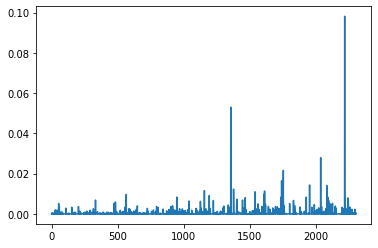

In [82]:
plt.plot(m3_p_xgb.feature_importances_)

In [18]:
%%time
Y_COLUMN = 'M3 Mg'

m3_mg_xgb = basic_xgboost3(X_train, y_train[Y_COLUMN])


Training model for M3 Mg.
1277 samples available.
CV r^2 score: -0.002401975056961325
CPU times: user 1.41 s, sys: 1.06 ms, total: 1.41 s
Wall time: 1.4 s


In [ ]:
Y_COLUMN = 'M3 P'

In [26]:
%%time
Y_COLUMN = 'M3 Mg'

m3_mg_xgb = basic_xgboost3(X_train, y_train[Y_COLUMN])

Training model for M3 Mg.
1277 samples available.
CV r^2 score: 0.645165407991274
CPU times: user 4min 12s, sys: 76 ms, total: 4min 12s
Wall time: 4min 12s


In [27]:
%%time
m3_mg_xgb.fit(X_train, y_train[Y_COLUMN])

CPU times: user 1min 21s, sys: 16 ms, total: 1min 21s
Wall time: 1min 21s


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=20, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [28]:
%%time
yhat = m3_mg_xgb.predict(X_validate)

CPU times: user 24.9 ms, sys: 4 ms, total: 28.9 ms
Wall time: 28.1 ms


In [40]:
rmse = np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))

In [41]:
_mean = y[Y_COLUMN].mean()

In [42]:
rmse / _mean

0.0648945510462739

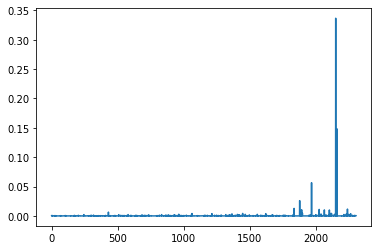

In [79]:
plt.plot(m3_mg_xgb.feature_importances_)

In [44]:
y[Y_COLUMN].std()

0.18552749620900413

In [ ]:
# plot prediction vs output, compare visually
#partial dependency, how far off on avg, always wrong in this region vs that region and informs features to engineer

In [45]:
%%time
Y_COLUMN = 'M3 P'
m3_p_xgb = basic_xgboost3(X_train, y_train[Y_COLUMN])

In [46]:
m3_p_xgb.fit(X_train, y_train[Y_COLUMN])
yhat = m3_p_xgb.predict(X_validate)
rmse = np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))
_mean = y[Y_COLUMN].mean()
rmse / _mean

0.2608249363629176

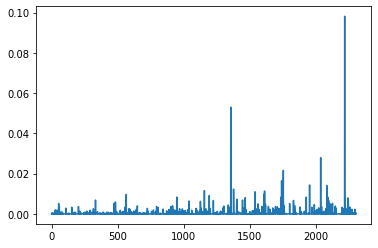

In [78]:
plt.plot(m3_p_xgb.feature_importances_)

In [47]:
%%time
Y_COLUMN = 'M3 K'
m3_k_xgb = basic_xgboost3(X_train, y_train[Y_COLUMN])

Training model for M3 K.
1277 samples available.
CV r^2 score: 0.44896083662554775
CPU times: user 5min 29s, sys: 84 ms, total: 5min 29s
Wall time: 5min 29s


In [48]:
%%time
m3_k_xgb.fit(X_train, y_train[Y_COLUMN])
yhat = m3_k_xgb.predict(X_validate)
rmse = np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))
_mean = y[Y_COLUMN].mean()
rmse / _mean

CPU times: user 2min 7s, sys: 20 ms, total: 2min 7s
Wall time: 2min 7s


0.07712345694923932

In [49]:
np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))

0.13204418023958925

In [51]:
np.sqrt(mean_squared_log_error(y_test[Y_COLUMN], yhat))

0.05750316695953364

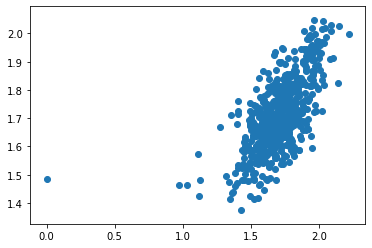

In [54]:
plt.scatter(y_test[Y_COLUMN], yhat)

In [59]:
m3_k_xgb.score(X_validate, y_test[Y_COLUMN])

0.4400076265834207

In [76]:
m3_k_xgb.feature_importances_[:5]


array([0.0000000e+00, 0.0000000e+00, 6.6897897e-08, 4.0640258e-05,
       0.0000000e+00], dtype=float32)

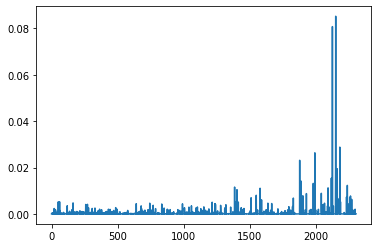

In [74]:
plt.plot(m3_k_xgb.feature_importances_